In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [0]:
from zipfile import ZipFile

 

with ZipFile('/content/drive/My Drive/casestudy-Widgets/UI-Widget-case study.zip', 'r') as zipObj:

  zipObj.extractall('/content/drive/My Drive/casestudy-Widgets-assignmentdata/')

In [0]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (60,60,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [0]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=11)) 
 


In [175]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 58, 58, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 32)         

In [0]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [178]:
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/casestudy-Widgets-assignmentdata/UI-Widget-case study/training_set',
        target_size=(60, 60),
        class_mode='categorical')

Found 7040 images belonging to 11 classes.


In [179]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/casestudy-Widgets-assignmentdata/UI-Widget-case study/test_set',
        target_size=(60, 60),
        class_mode='categorical')

Found 560 images belonging to 11 classes.


In [188]:
model.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set)


Epoch 1/5
220/220 [==============================] - 65s 293ms/step - loss: 0.3893 - acc: 0.8636 - val_loss: 0.3816 - val_acc: 0.9054
Epoch 2/5
220/220 [==============================] - 64s 290ms/step - loss: 0.0435 - acc: 0.9886 - val_loss: 0.3846 - val_acc: 0.8661
Epoch 3/5
220/220 [==============================] - 64s 290ms/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.2436 - val_acc: 0.9446
Epoch 4/5
220/220 [==============================] - 64s 289ms/step - loss: 0.0291 - acc: 0.9929 - val_loss: 0.2225 - val_acc: 0.9482
Epoch 5/5
220/220 [==============================] - 64s 291ms/step - loss: 0.0315 - acc: 0.9915 - val_loss: 0.1506 - val_acc: 0.9696


In [171]:
train_set.class_indices

{'cards': 0,
 'checkbox': 1,
 'combobox': 2,
 'enable_disable': 3,
 'forward': 4,
 'home': 5,
 'information_icon': 6,
 'tabview': 7,
 'textbox': 8,
 'window_header': 9,
 'zoom': 10}

In [66]:
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [0]:
import cv2
import numpy as np



In [0]:
#Prediction

In [0]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/casestudy-Widgets-assignmentdata/UI-Widget-case study/test_set/home/home1.png'
                           ,target_size =(60,60))


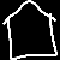

In [208]:
test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [210]:
test_image.shape

(60, 60, 3)

In [0]:
test_image=test_image.reshape(1,60, 60, 3)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [213]:
np.around(result)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
result=result.argmax()

In [215]:
result

5

In [0]:
## Class label of dog and cat

if result == 0:
    prediction = 'cards'
elif result == 1:
    prediction = 'checkbox'
elif result == 2:
    prediction = 'combobox'
elif result == 3:
    prediction = 'enable_disable'
elif result == 4:
    prediction = 'forward'
elif result == 5:
    prediction = 'home'
elif result == 6:
    prediction = 'information_icon'
elif result == 7:
    prediction = 'tabview'
elif result == 8:
    prediction = 'textbox'
elif result == 9:
    prediction = 'window_header'
else:
    prediction = 'zoom'
    

In [217]:
prediction

'home'